In [13]:
from simulate_returns import * 
import numpy as np
import matplotlib.pyplot as plt
import math
from helper_whole_sim import * 

In [14]:
np.random.uniform(0.015,0.03)

0.019949989292196713

In [15]:
T = 24*365*5
### Low returns:
start_rate = np.random.uniform(0.015,0.03) 
market_time,market_sentiment,b_value_low,r_t_low,default_prob_low,returns_low,low_hack = sim_returns(starting_b_value = np.random.uniform(0.015,0.03),low_bound_b = 0.015,upper_bound_b = 0.03,ltr_vol_std = 0.15, probability_of_default = 0.0050913349, ltr_default_prob = 0.00449325 , starting_staking_rate = start_rate, r_t_sigma = 8 , sigma_market_time = 2 , max_prob = 0.4)


In [16]:
start_rate = np.random.uniform(0.03,0.05)
b_value_mid,r_t_mid,default_prob_mid,returns_mid,mid_hack = sim_returns_known_sent(market_time,market_sentiment,starting_b_value = np.random.uniform(0.03,0.05),low_bound_b = 0.03,upper_bound_b = 0.05 , probability_of_default = 0.02940694, ltr_default_prob = 0.018188597 , starting_staking_rate =start_rate , r_t_sigma = 10 , max_prob = 0.4)
start_rate = np.random.uniform(0.07,0.1)
b_value_high,r_t_high,default_prob_high,returns_high, high_hack = sim_returns_known_sent(market_time,market_sentiment,starting_b_value = np.random.uniform(0.07,0.1),low_bound_b = 0.07,upper_bound_b = 0.1, probability_of_default = 0.13147627, ltr_default_prob = 0.0985713 , starting_staking_rate = start_rate, r_t_sigma = 12 , max_prob = 0.4)


In [17]:
### 20% max for high risk.
### low risk: 40%
### medium risk: 40%

### Starting value of staking: Low risk: 2%, medium risk 3.5%, high risk: 6%

### Long term probabilities of default per protocol:
### low risk: 0.15, mid risk: 0.61, high risk: 3.4
### This nets (for 3 protocols): 0.00449325, 0.018188597, 0.0985713
### Current probabilities of default per protocol:
### low risk: 0.17, mid risk: 0.99, high risk: 4.59
### This nets (for 3 protocols): 0.0050913349, 0.02940694, 0.13147627

In [18]:
### 12% is the high and the low

### AAve 2%

### Circle 4%

### Low risk [1.5% 3%]

### Medium risk [3% 5%]

## high risk [6%,9%]

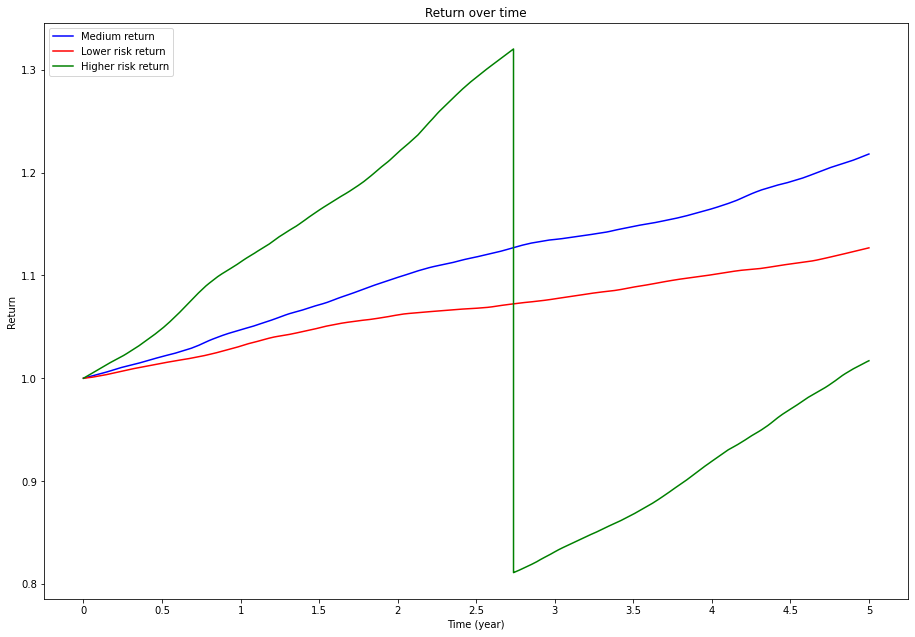

In [19]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(returns_mid,color = "b")
ax1.plot(returns_low,color = "r")
ax1.plot(returns_high,color = "g")

labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Return over time")
plt.legend(["Medium return","Lower risk return","Higher risk return"],loc = "upper left")
plt.show()

In [20]:
print(sum(mid_hack))
print(sum(low_hack))
print(sum(high_hack))


0.0
0.0
0.38564168410569594


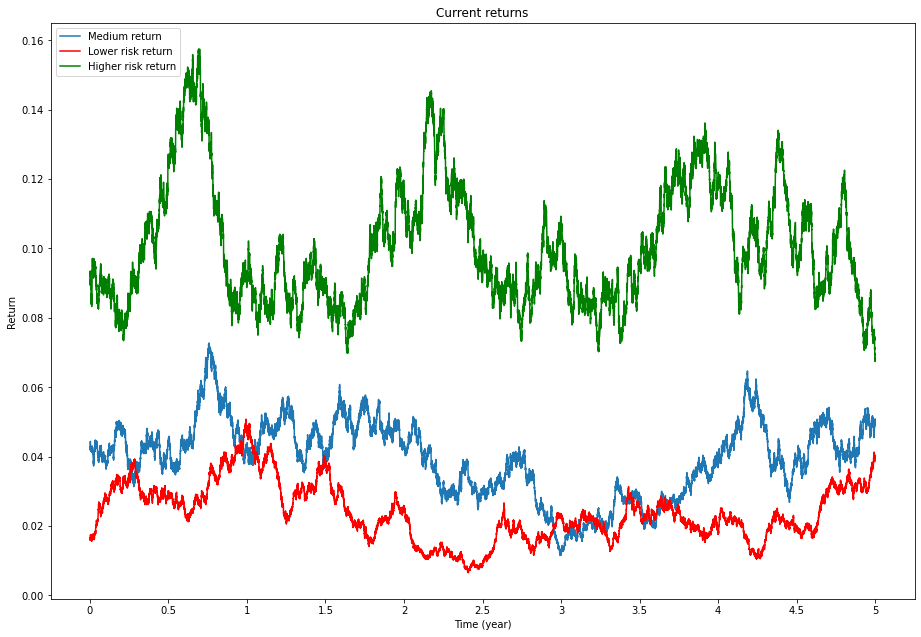

In [21]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(r_t_mid)
ax1.plot(r_t_low,color = "r")
ax1.plot(r_t_high,color = "g")
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Current returns")
plt.legend(["Medium return","Lower risk return","Higher risk return"],loc = "upper left")

plt.show()

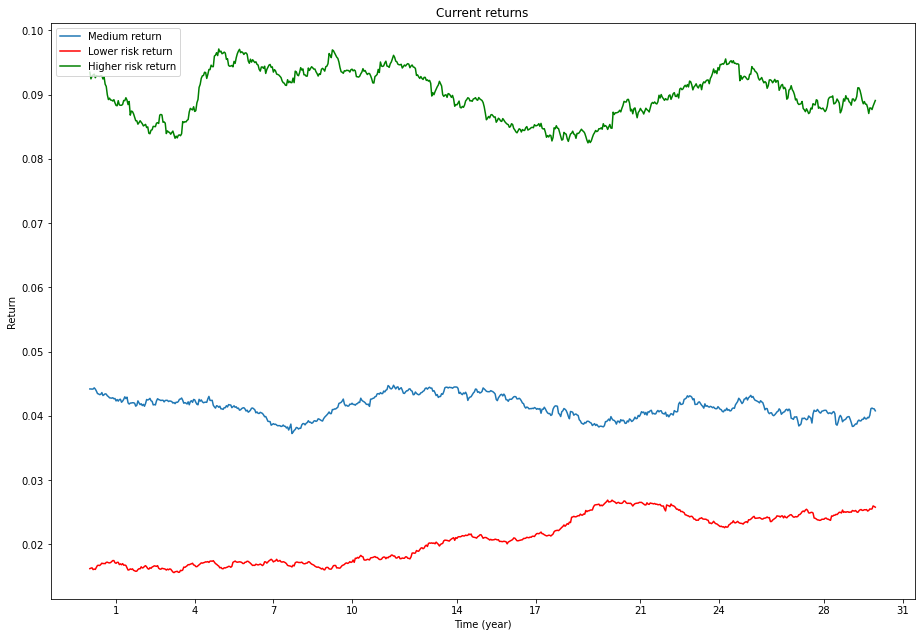

In [22]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [int(0.2*(1/365)*T),int(0.2*(4/365)*T), int(0.2*(7/365)*T), int(0.2*(10/365)*T), int(0.2*(14/365)*T),
     int(0.2*(17/365)*T),int(0.2*(21/365)*T),int(0.2*(24/365)*T),int(0.2*(28/365)*T),int(0.2*(31/365)*T)]
ax1.plot(r_t_mid[int(0.2*(1/365)*T):int((31/365)*0.2*T)])
ax1.plot(r_t_low[int(0.2*(1/365)*T):int((31/365)*0.2*T)],color = "r")
ax1.plot(r_t_high[int(0.2*(1/365)*T):int((31/365)*0.2*T)],color = "g")
labels = [1,4, 7, 10, 14, 17, 21,24,28,31]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Current returns")
plt.legend(["Medium return","Lower risk return","Higher risk return"],loc = "upper left")

plt.show()

(We can in some way compare it to: https://app.aave.com/reserve-overview/?underlyingAsset=0x6b175474e89094c44da98b954eedeac495271d0f&marketName=proto_mainnet)

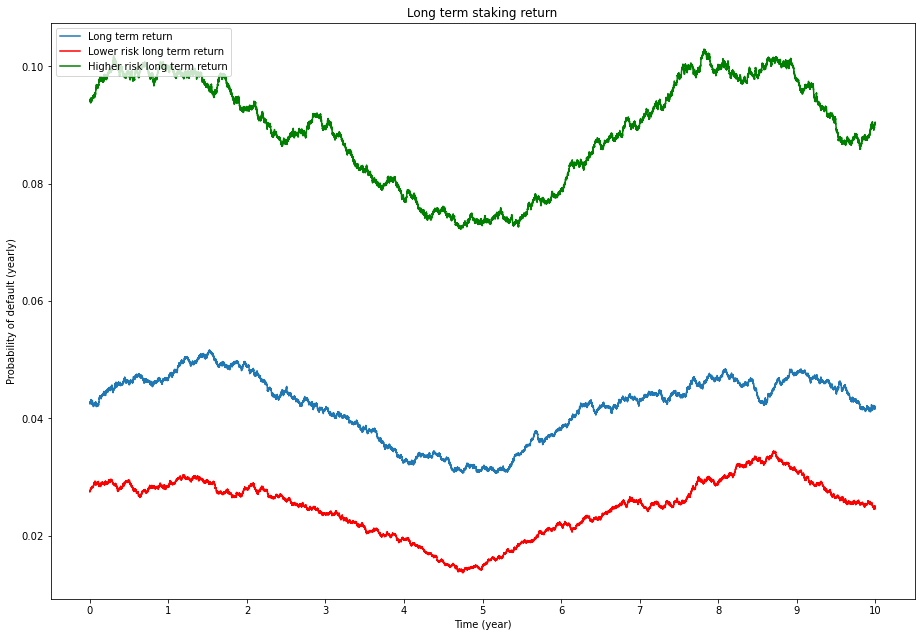

In [23]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(b_value_mid)
ax1.plot(b_value_low,color = "r")
ax1.plot(b_value_high,color = "g")
labels = [0,1, 2, 3, 4, 5, 6,7,8,9,10]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Probability of default (yearly)")
plt.title("Long term staking return")
plt.legend(["Long term return","Lower risk long term return","Higher risk long term return"],loc = "upper left")
plt.show()

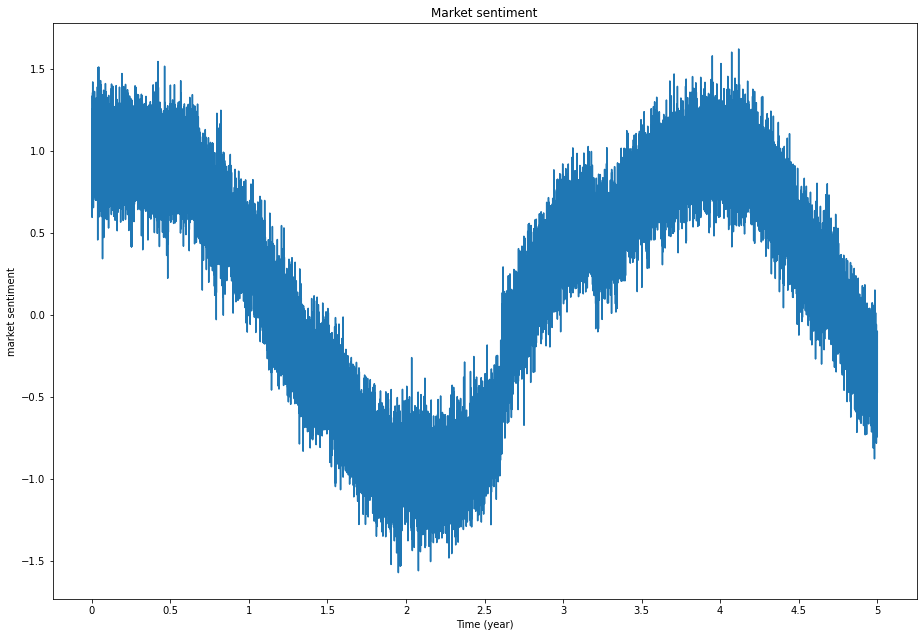

In [24]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(market_sentiment)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("market sentiment")
plt.title("Market sentiment")
plt.show()

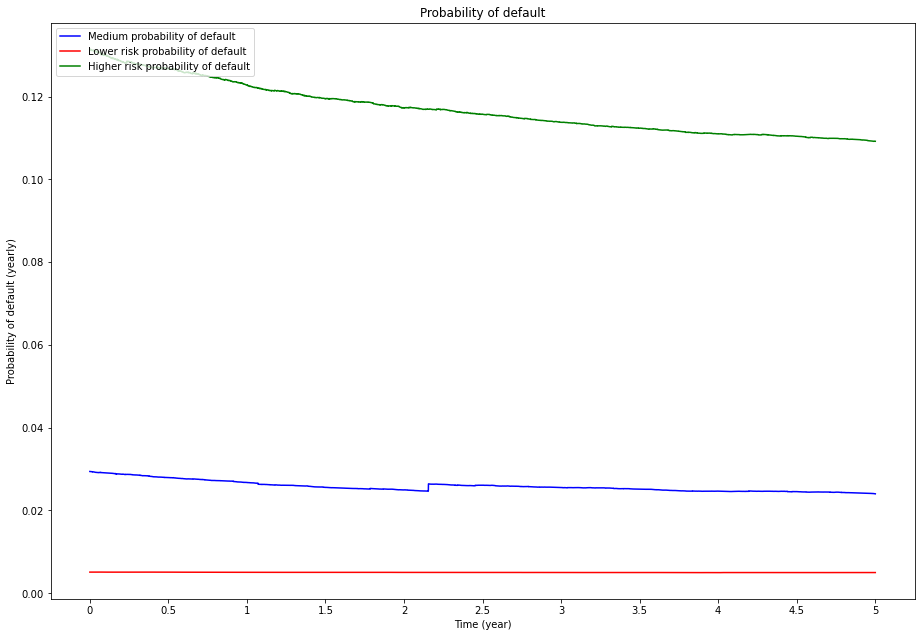

In [13]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(default_prob_mid,color="b")
ax1.plot(default_prob_low,color = "r")
ax1.plot(default_prob_high,color = "g")
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Probability of default (yearly)")
plt.title("Probability of default")
plt.legend(["Medium probability of default","Lower risk probability of default","Higher risk probability of default"],loc = "upper left")

plt.show()

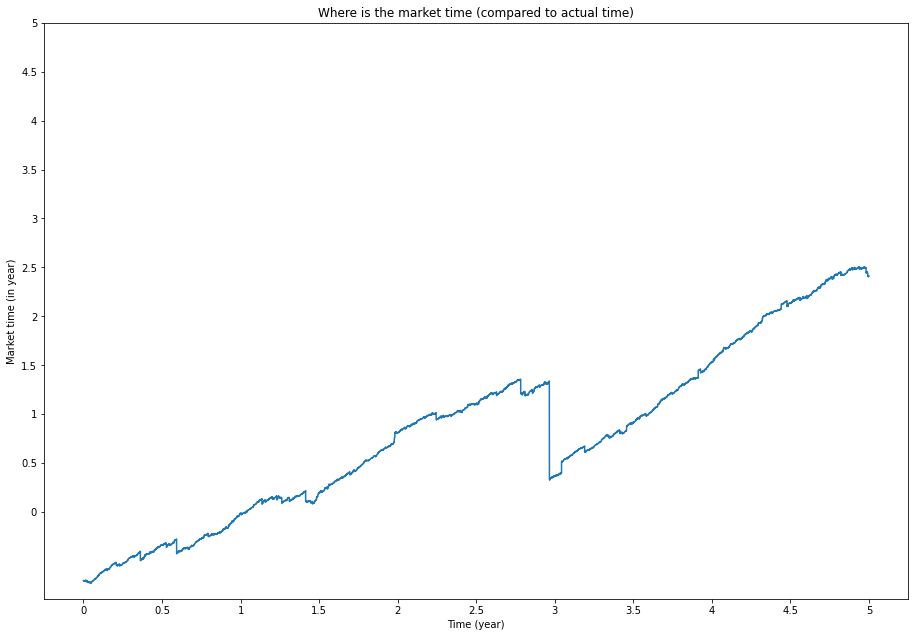

In [14]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(market_time)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.yticks(x,labels)
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Market time (in year)")
plt.title("Where is the market time (compared to actual time)")
plt.show()

In [15]:
index_growth, index_sim, price = simulate_index(N=1)

In [16]:
### Set up investments in liquid reserve, investments and deposits;
asset_distr = [0.15,0.848,0.002]


In [17]:
our_usage = usage_sim(sigma_usage=1)

T=24*365 * 5
growth, treasuries, tokens, liabilities, collateral, investments, liquid_reserve, lrisk_pool, mrisk_pool, hrisk_pool, low_risk1day, low_risk30day, low_risk180day, low_risk1year, med_risk1day, med_risk30day, med_risk180day,med_risk1year, high_risk1day, high_risk30day, high_risk180day, high_risk1year, dep_rewards, sum_deposit, tokens_currently_deposited,percentage_deposited,usd_currently_deposited,foundation_fee,price, CAR_gen , our_slippage_income,foundation_slippage_income,slippage = larger_sim(returns_low,returns_mid,returns_high,incoming_price = price[0],market_sentiment = market_sentiment,staking_rate_other = r_t_mid,rt_low = r_t_low,rt_high = r_t_high, deposit_rate = r_t_mid ,usage_growth = our_usage, stakers_share = np.zeros(int(T*10)) + .15,index_appreciation_incoming = index_growth[0], target_liquid = .25, starting_network_lower = 2 * 10**7, starting_network_upper = 3 * 10**7,low_risk_hack = low_hack,mid_risk_hack = mid_hack,high_risk_hack = high_hack,dist_asset = asset_distr)



CAR just dropped below .75
CAR just dropped below .75


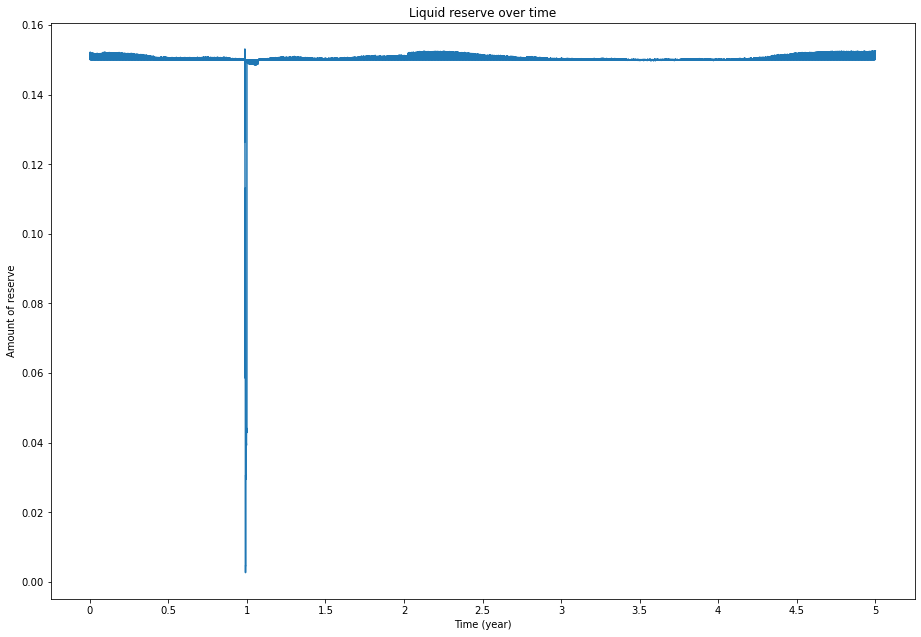

In [18]:
fractional_reserve = liquid_reserve/liabilities
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(fractional_reserve)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount of reserve")
plt.title("Liquid reserve over time")
plt.show()


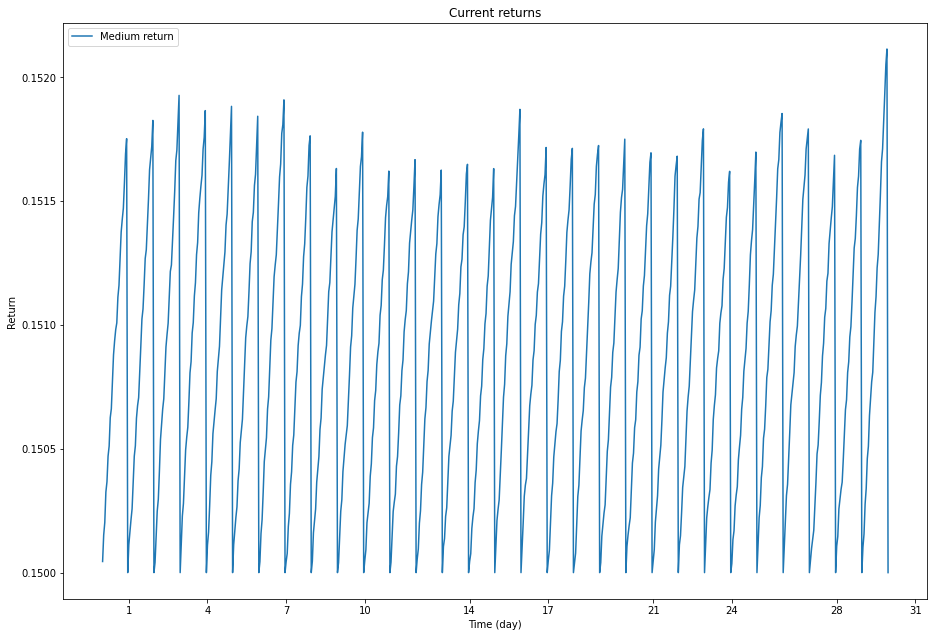

In [19]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [int(0.2*(1/365)*T),int(0.2*(4/365)*T), int(0.2*(7/365)*T), int(0.2*(10/365)*T), int(0.2*(14/365)*T),
     int(0.2*(17/365)*T),int(0.2*(21/365)*T),int(0.2*(24/365)*T),int(0.2*(28/365)*T),int(0.2*(31/365)*T)]
ax1.plot(fractional_reserve[int(0.2*(1/365)*T):int((31/365)*0.2*T)])
labels = [1,4, 7, 10, 14, 17, 21,24,28,31]
plt.xticks(x,labels)
plt.xlabel("Time (day)")
plt.ylabel("Return")
plt.title("Current returns")
plt.legend(["Medium return","Lower risk return","Higher risk return"],loc = "upper left")

plt.show()

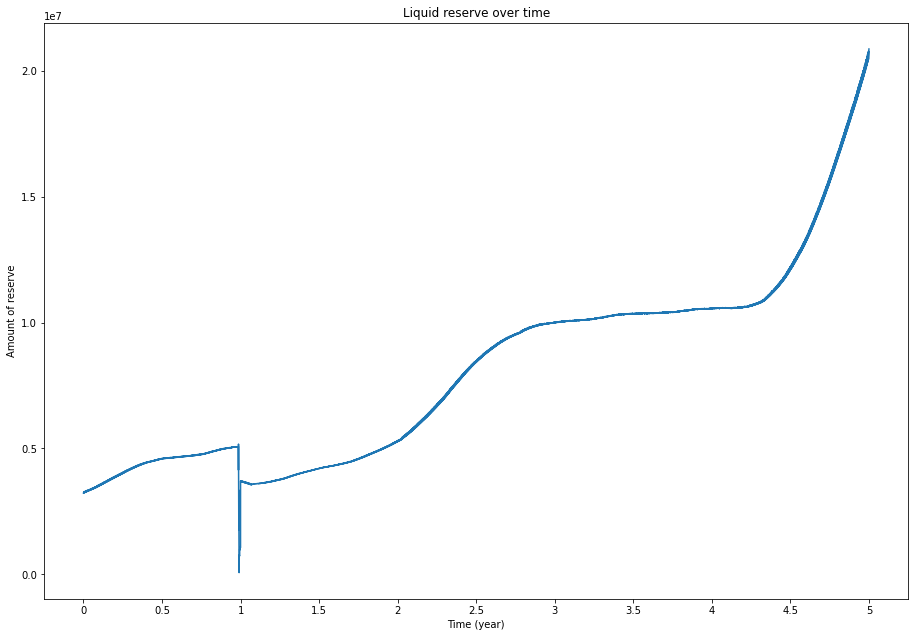

In [20]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(liquid_reserve)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount of reserve")
plt.title("Liquid reserve over time")
plt.show()


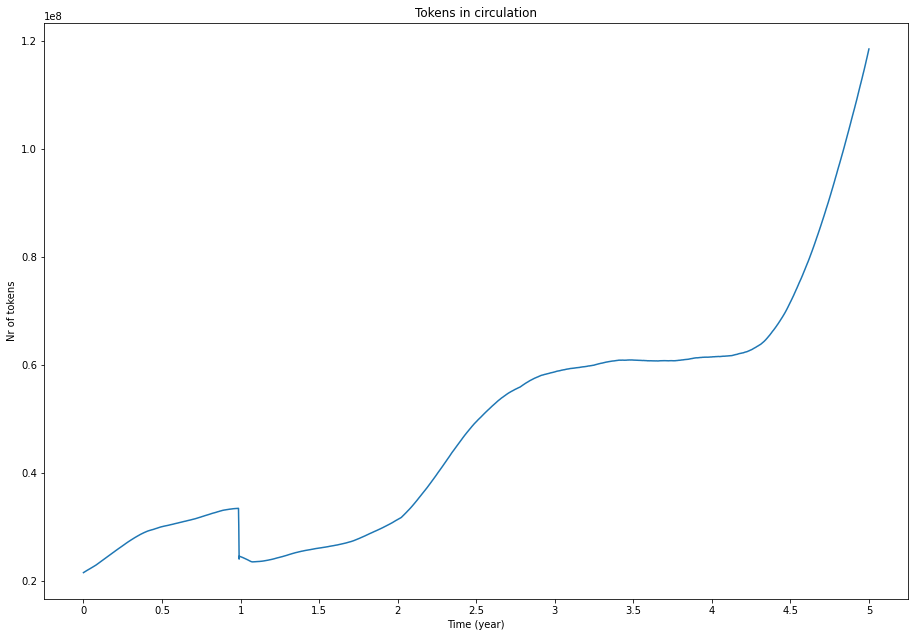

In [21]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(tokens)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Nr of tokens")
plt.title("Tokens in circulation")
plt.show()


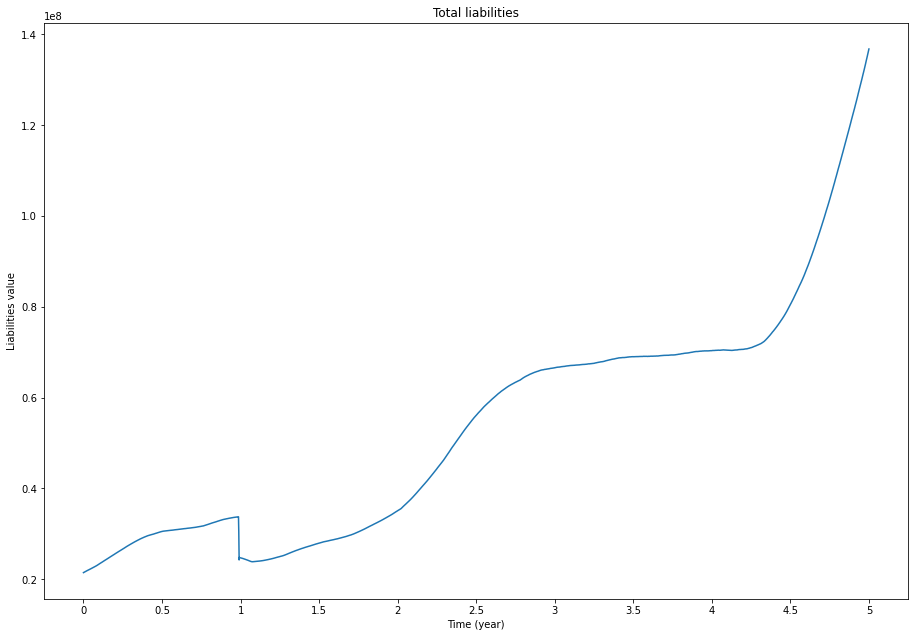

In [22]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(liabilities)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Liabilities value")
plt.title("Total liabilities")
plt.show()


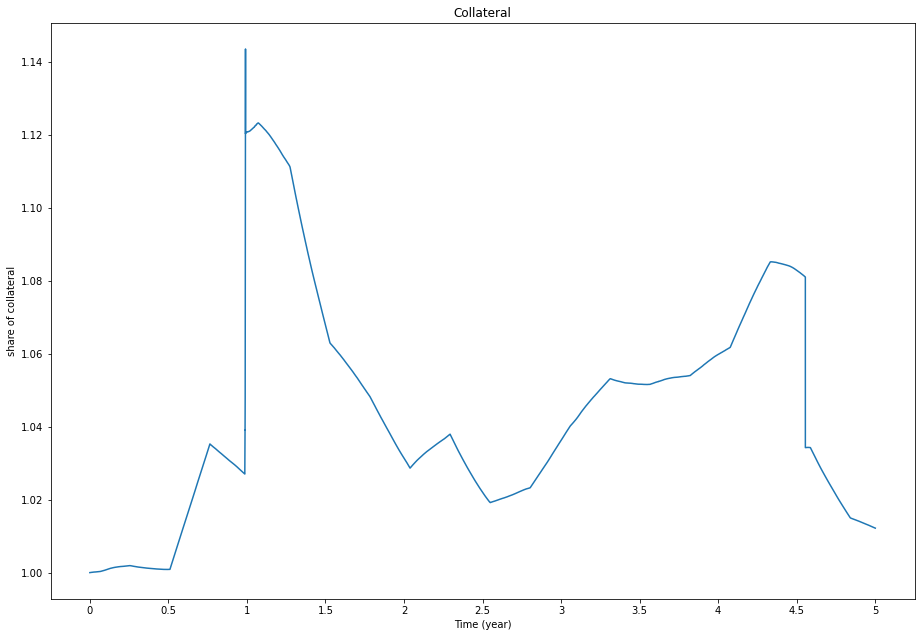

In [23]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(collateral)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("share of collateral")
plt.title("Collateral")
plt.show()


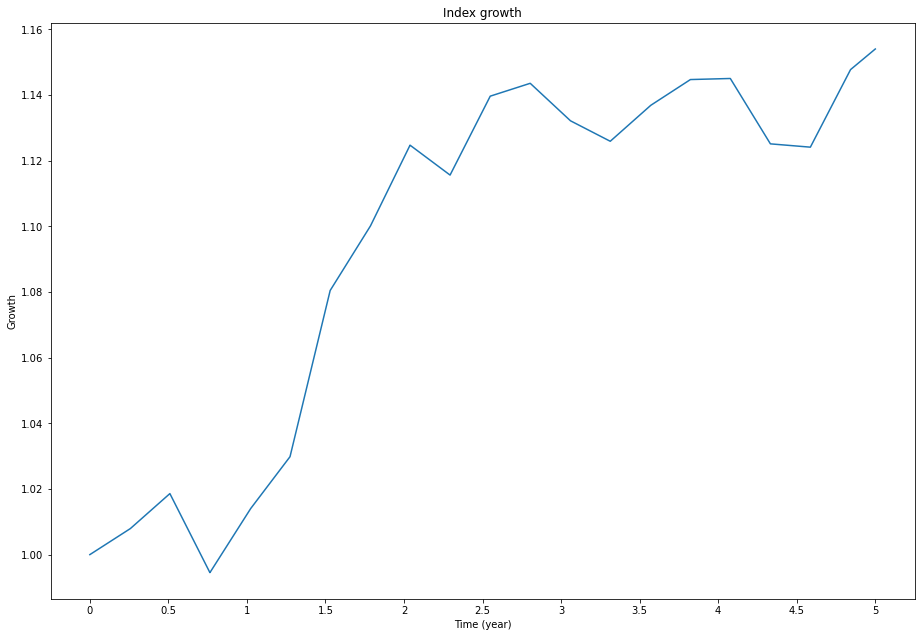

In [24]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(price)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Index growth")
plt.show()


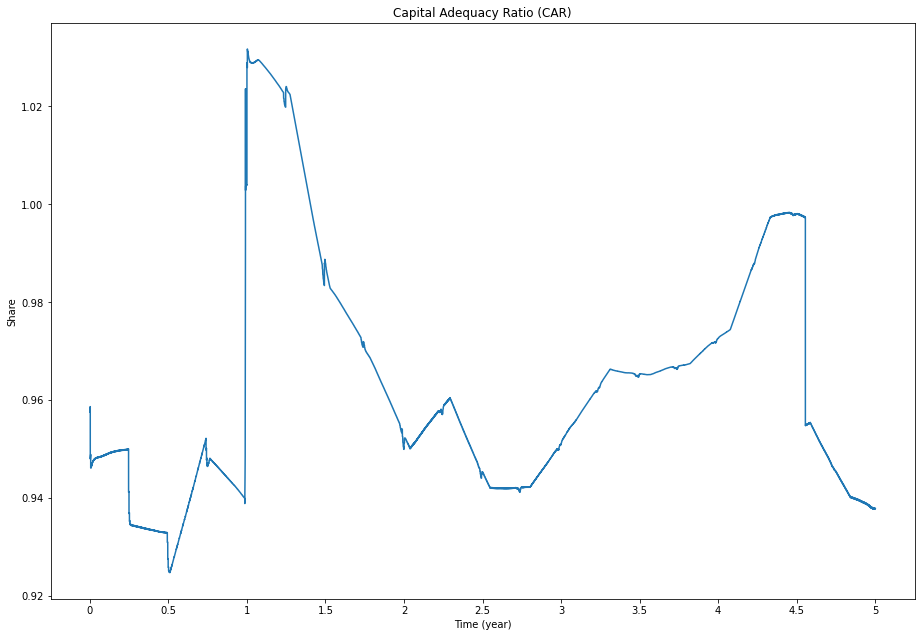

In [25]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(CAR_gen[1:])
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Share")
plt.title("Capital Adequacy Ratio (CAR)")
plt.show()


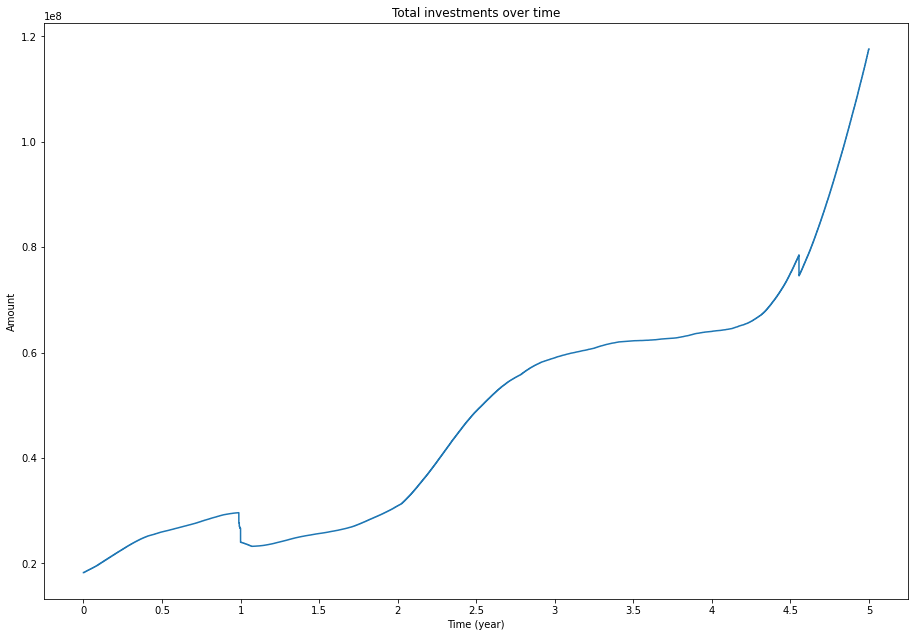

In [26]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(investments)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount")
plt.title("Total investments over time")
plt.show()


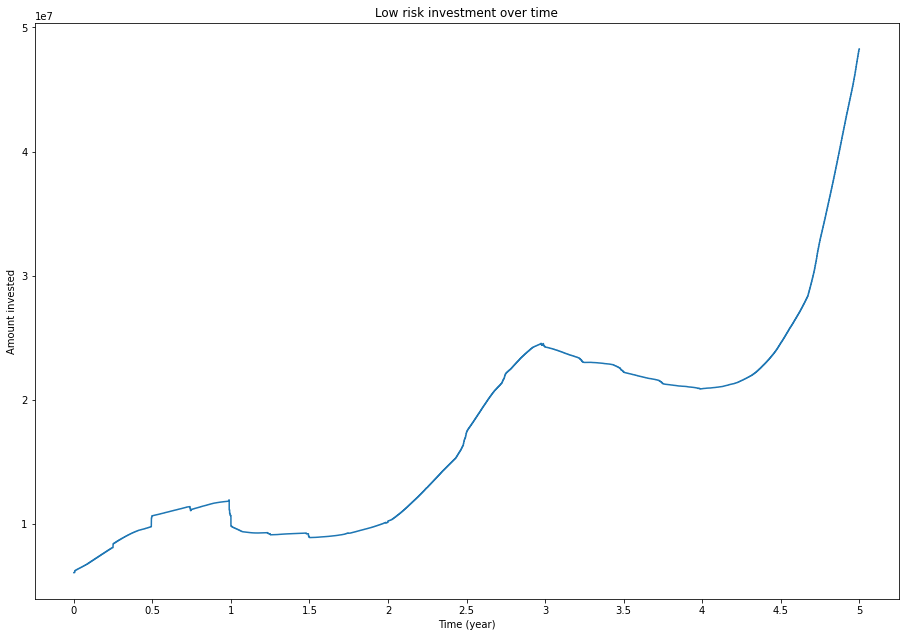

In [27]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(lrisk_pool)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount invested")
plt.title("Low risk investment over time")
plt.show()


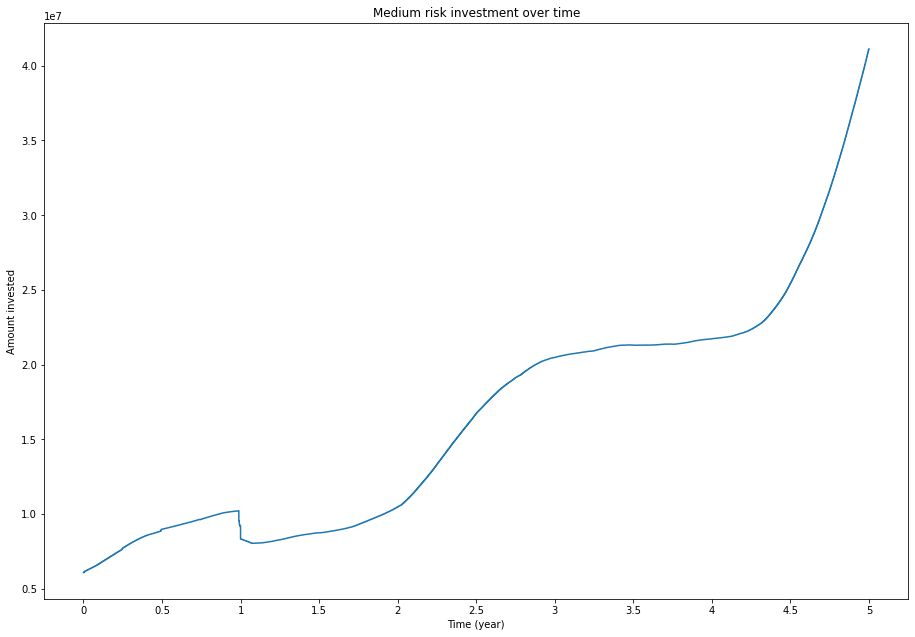

In [28]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(mrisk_pool)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount invested")
plt.title("Medium risk investment over time")
plt.show()


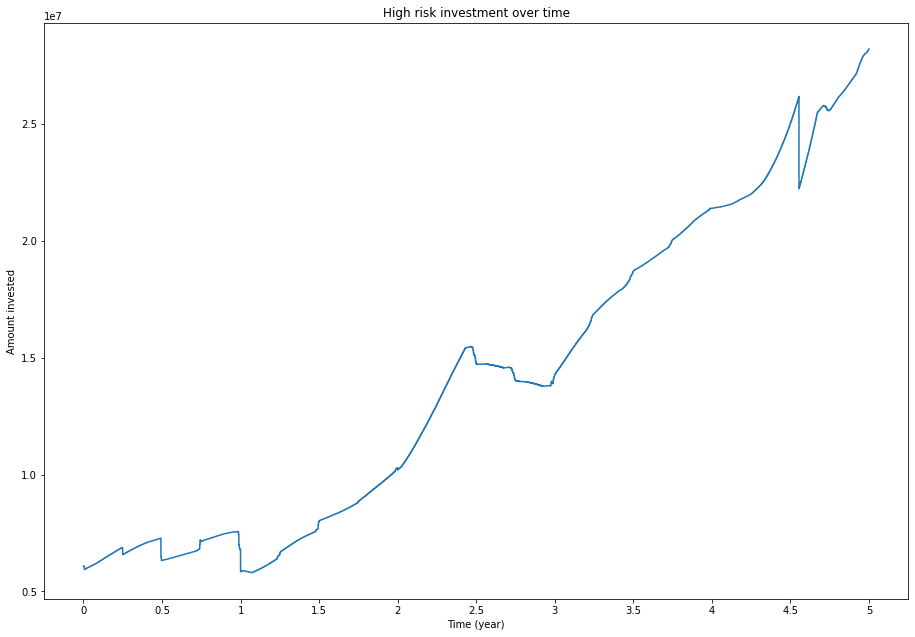

In [29]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(hrisk_pool)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount invested")
plt.title("High risk investment over time")
plt.show()


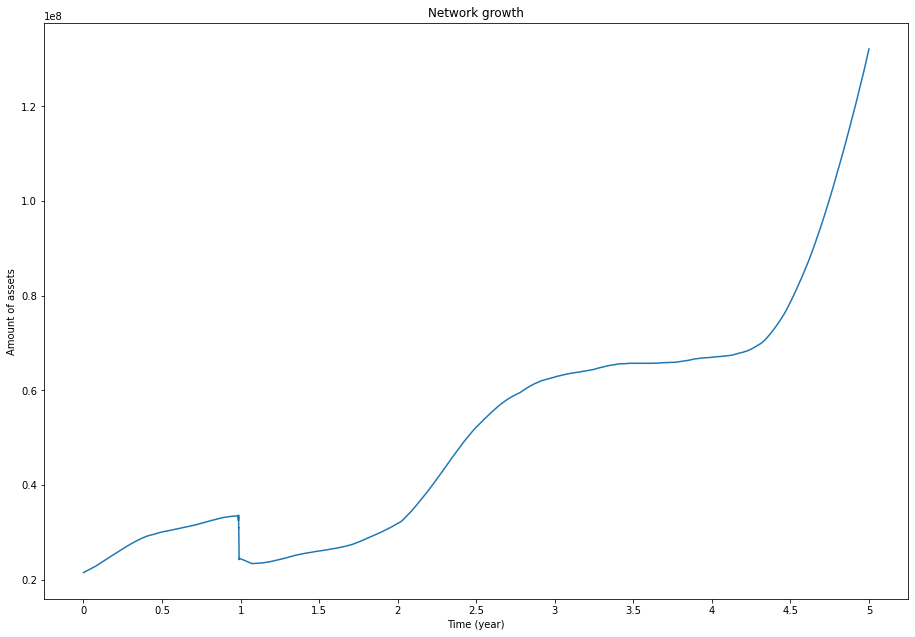

In [30]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(growth)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount of assets")
plt.title("Network growth")
plt.show()


Deposit progress:

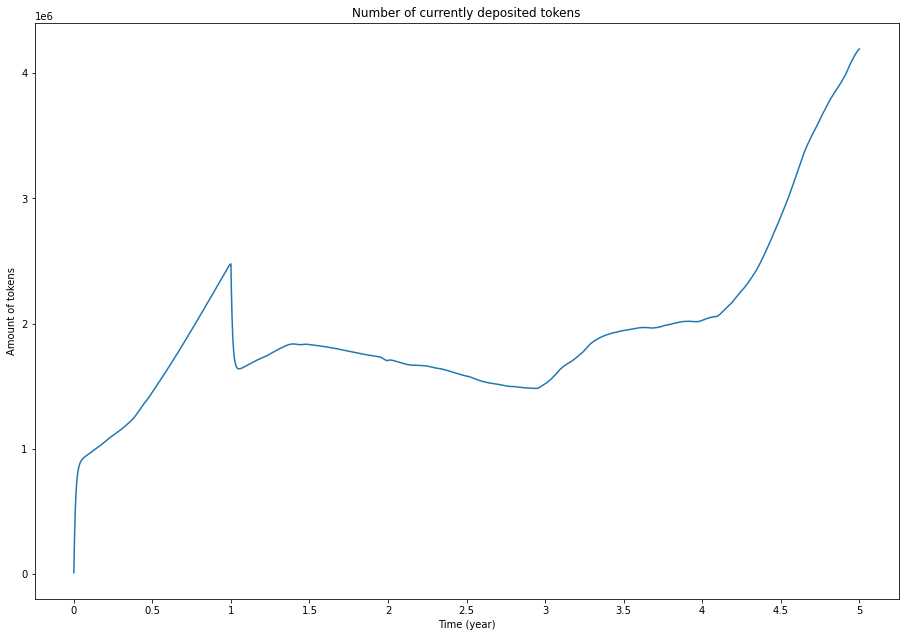

In [31]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(tokens_currently_deposited)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Amount of tokens")
plt.title("Number of currently deposited tokens")
plt.show()


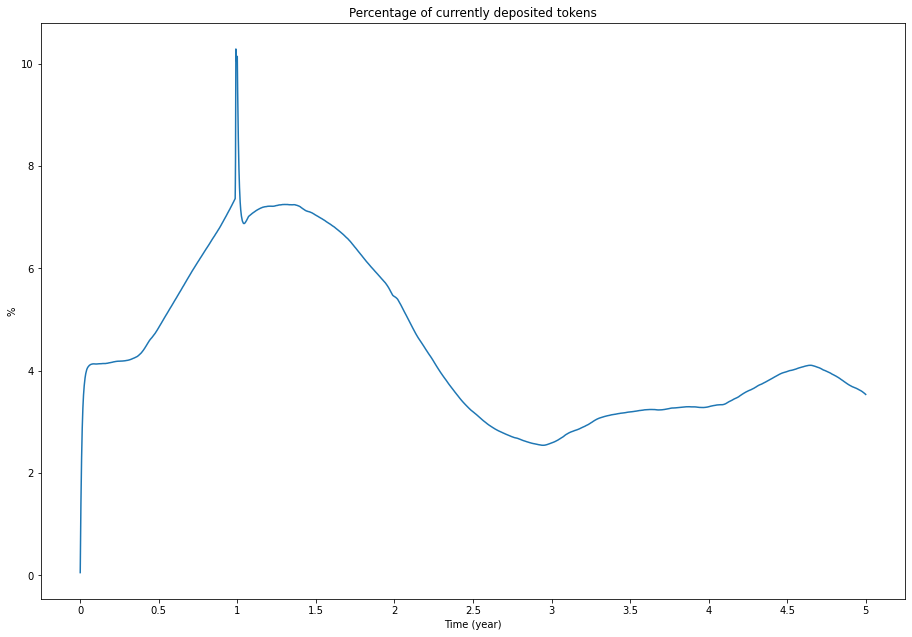

In [32]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(percentage_deposited*100)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("%")
plt.title("Percentage of currently deposited tokens")
plt.show()


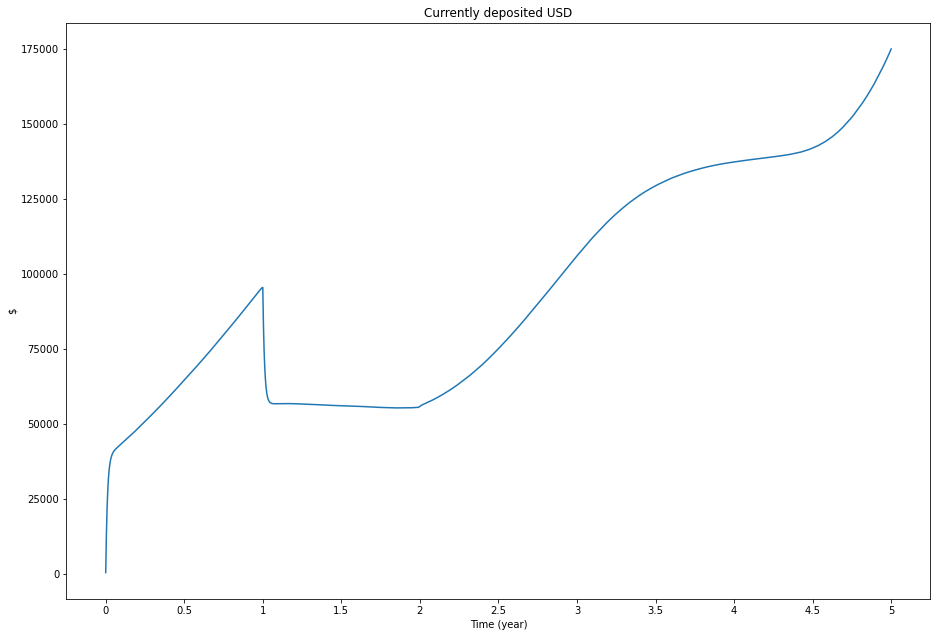

In [33]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(usd_currently_deposited)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("$")
plt.title("Currently deposited USD")
plt.show()


In [34]:
percentage_usd_deposited = usd_currently_deposited/treasuries
percentage_usd_deposited

array([1.91410453e-05, 3.80773432e-05, 5.68150596e-05, ...,
       1.26335324e-03, 1.26324706e-03, 1.26322934e-03])

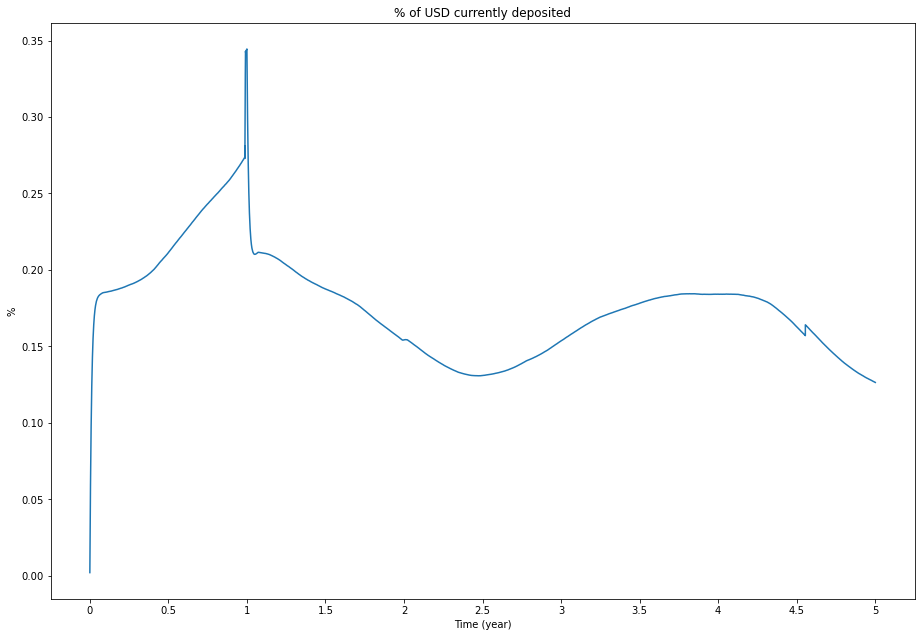

In [35]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(percentage_usd_deposited*100)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("%")
plt.title("% of USD currently deposited")
plt.show()


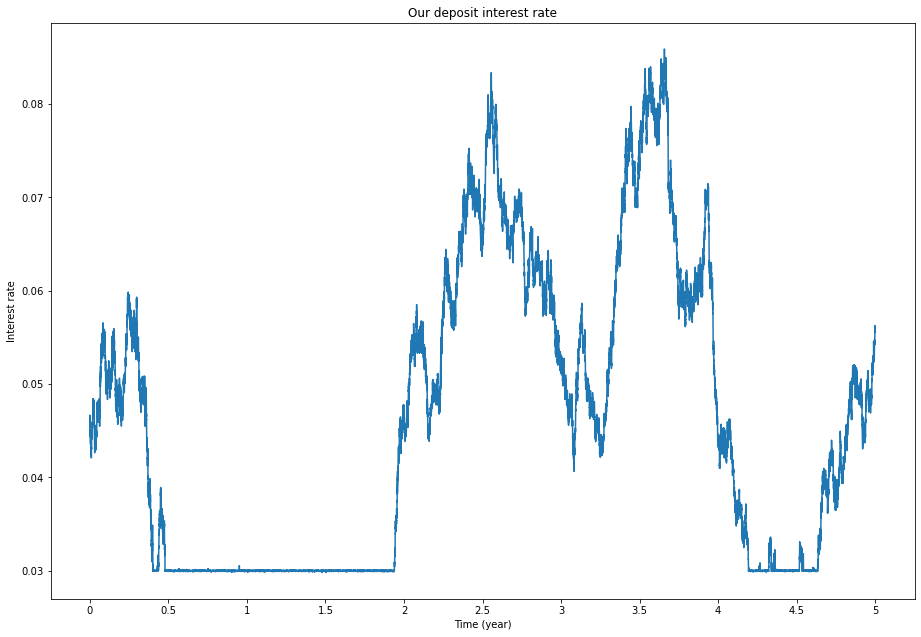

In [36]:
fractional_reserve = liquid_reserve/liabilities
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(dep_rewards[1:])
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Interest rate")
plt.title("Our deposit interest rate")
plt.show()


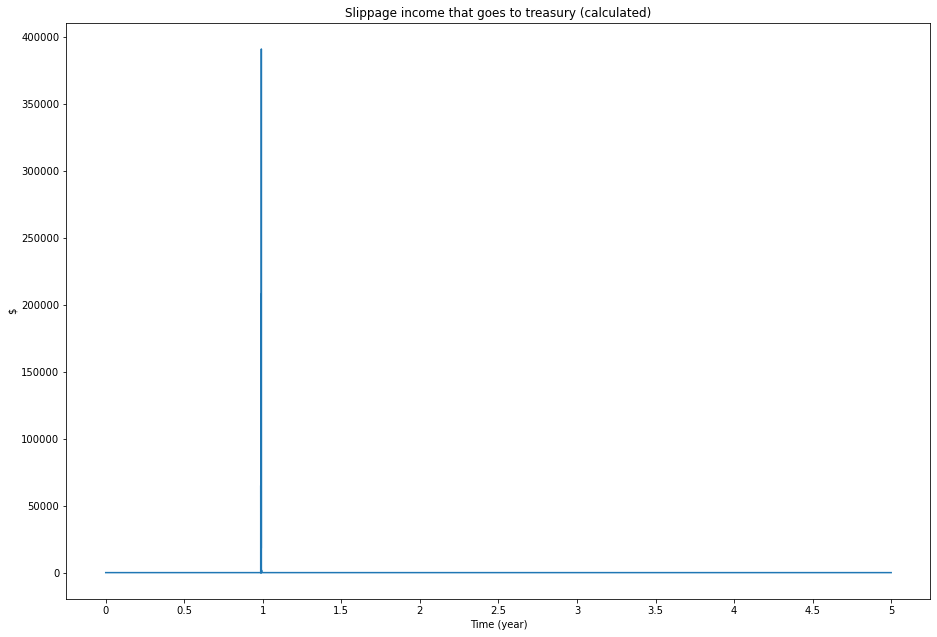

In [37]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(our_slippage_income)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("$")
plt.title("Slippage income that goes to treasury (calculated)")
plt.show()


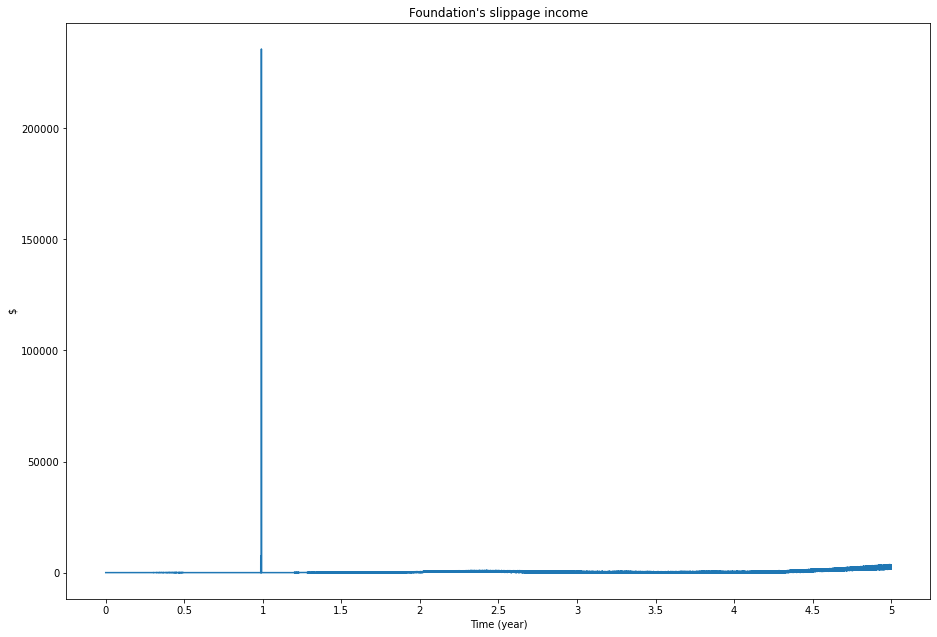

In [38]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(foundation_slippage_income)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("$")
plt.title("Foundation's slippage income")
plt.show()


In [39]:
foundation_yearly_rev = [sum(foundation_slippage_income[0:(365*24)]),sum(foundation_slippage_income[(365*24+1):(365*24*2)]),
                        sum(foundation_slippage_income[(365*24*2+1):(365*24*3)]),sum(foundation_slippage_income[(365*24*3+1):(365*24*4)]),
                        sum(foundation_slippage_income[(365*24*4+1):(365*24*5)])]
foundation_yearly_rev = foundation_fee + foundation_yearly_rev
foundation_yearly_rev

array([  341447.4154411 ,  1083607.95625657,  4816610.55385591,
        5781675.71276136, 10996942.8311668 ])

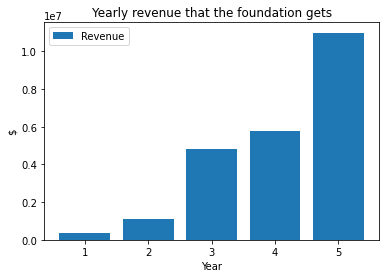

In [40]:
fig, ax = plt.subplots()

ax.bar([1,2,3,4,5], foundation_yearly_rev, label='Revenue')


ax.set_ylabel('$')
ax.set_xlabel('Year')
ax.set_title('Yearly revenue that the foundation gets')
ax.legend()

plt.show()

In [41]:
foundation_yearly_rev

array([  341447.4154411 ,  1083607.95625657,  4816610.55385591,
        5781675.71276136, 10996942.8311668 ])

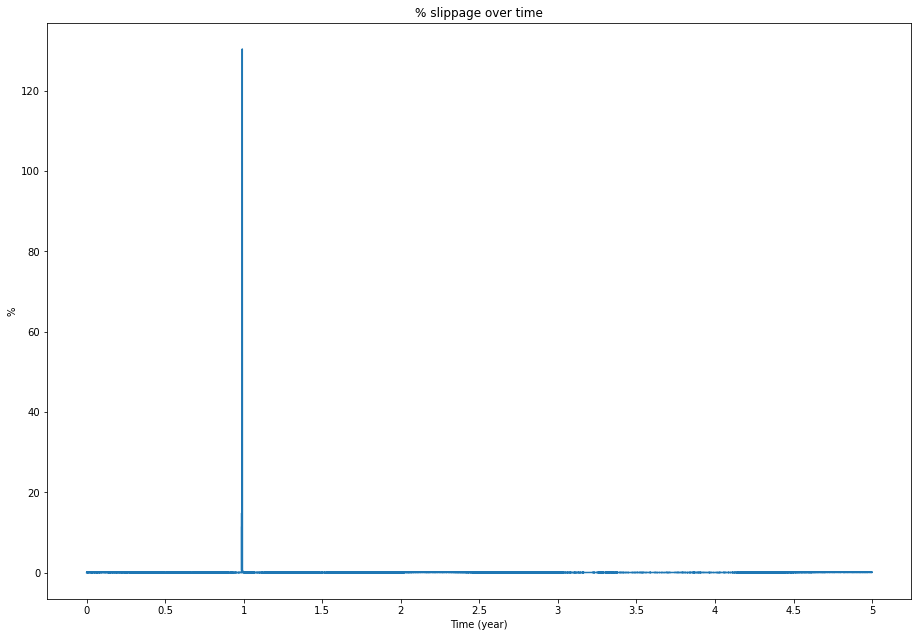

In [43]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
ax1.plot(slippage*100)
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("%")
plt.title("% slippage over time")
plt.show()


In [44]:
 min(['4.5', '7.8', '9.8', '10.3'])

'10.3'